# Deconvolution

In [2]:
import numpy as np
import matplotlib.pyplot as plt

$H(\omega) = \int_{-\infty}^{\infty}h(t)e^{-i\omega t}dt = g(\omega)e^{i\phi (\omega)}$

$D(\omega) = \frac{1}{H(\omega)} = \frac{1}{g(\omega)}e^{-i\phi (\omega)}$

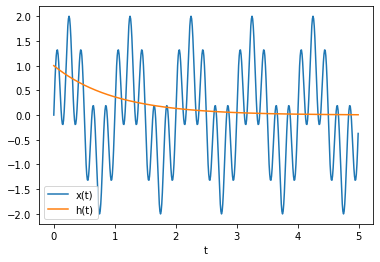

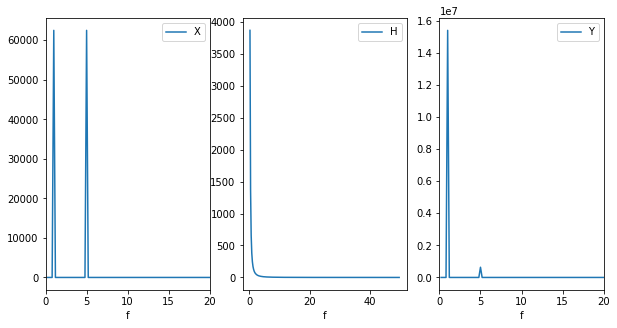

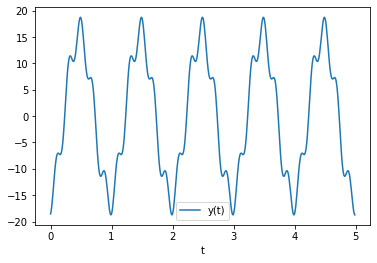

In [3]:
# Demo gain and phase shift form convolution
Fs = 100
tau = 1

# signal and kernel
t = np.arange(0,5,1/Fs)
x = np.sin(2*np.pi*t*1) + np.sin(2*np.pi*t*5)
h = np.exp(-t/tau)
plt.plot(t,x, label = "x(t)")
plt.plot(t,h, label = "h(t)")
plt.xlabel('t')
plt.legend()
plt.show()

# fft
f = np.fft.fftfreq(len(t),1/Fs) 
X = np.fft.fft(x)
H = np.fft.fft(h)
Y = X * H
fig= plt.figure(figsize=(10,5))
plt.subplot(131)
plt.plot(f[f>0],np.abs(X[f>0])**2, label = "X")
plt.xlim(0,20)
plt.xlabel('f')
plt.legend()
plt.subplot(132)
plt.plot(f[f>0],np.abs(H[f>0])**2, label = "H")
plt.xlabel('f')
plt.legend()
plt.subplot(133)
plt.plot(f[f>0],np.abs(Y[f>0])**2, label = "Y")
plt.xlim(0,20)
plt.legend()
plt.xlabel('f')
plt.show()

# ifft
y = np.fft.ifft(Y).real
#plt.plot(t,x, label = "x(t)")
plt.plot(t,y, label = "y(t)") 
plt.xlabel('t')
plt.legend()
plt.show()

Text(0.5, 0, 't')

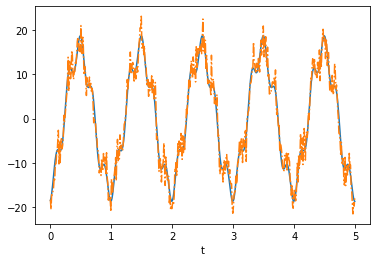

In [10]:
# add noise to the convolution signal (noise in the recording machine)
yn = y + 2*np.random.normal(0,1,len(y))
plt.plot(t,y,t,yn,'-.')
plt.xlabel('t')

Text(0.5, 0, 't')

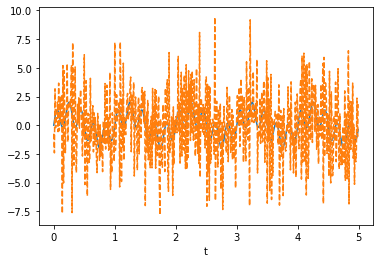

In [11]:
# normal deconvolution

YN = np.fft.fft(yn)
D = 1/H
XN = YN*D

xnd = np.fft.ifft(XN)

plt.plot(t,x,t,xnd.real,'--')
plt.xlabel('t')

Text(0, 0.5, 'power')

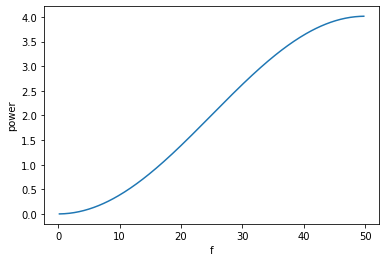

In [57]:
plt.plot(f[f>0],np.abs(1/H[f>0])**2)
plt.xlabel('f')
plt.ylabel('power')

Text(0, 0.5, 'power')

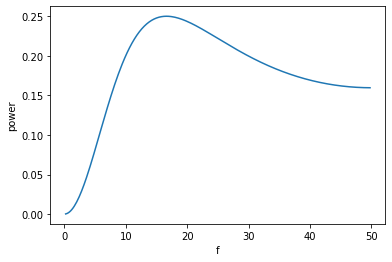

In [21]:
s = 1
DW = np.conj(H)/(np.abs(H)**2+1/s)
plt.plot(f[f>0],np.abs(DW[f>0])**2)
plt.xlabel('f')
plt.ylabel('power')

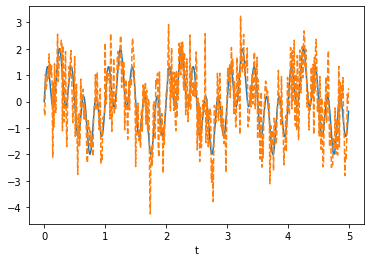

In [22]:
Xdw = YN*DW
xdw = np.fft.ifft(Xdw)
plt.plot(t,x, t, xdw.real,'--')
plt.xlabel('t')
plt.show()